# Agents of Living Dead

In [1]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import random
import numpy as np
%matplotlib inline

In [2]:
# extended sign function
def sign(x):
    if abs(x) < 0.5:
        return 0
    elif x >= 0.5:
        return 1
    else:
        return -1

def sign2(x):
    if abs(x) < 0.5:
        return 0
    elif x > 1:
        return 2
    elif x == 1.0:
        return 1
    elif x == -1.0:
        return -1
    else:
        return -2

In [3]:
class Agent:
    """random walking angent"""
    def __init__(self, x, y, is_living_dead = False):
        self.is_living_dead = is_living_dead
        self.x, self.y = x, y
        self.search()
        self.living_deads = set()
        self.humans = set()
        self.living_dead_x, self.living_dead_y = None, None
        self.human_x, self.human_y = None, None
        self.xtjct = [x]
        self.ytjct = [y]
        if self.is_living_dead:
            self.col = "red"
        else:
            self.col = "black"

    def search(self) -> set:
        self.searching_area = {(i, j) for i in range(self.x - 5, self.x + 1 + 5) for j in range(self.y - 5, self.y + 1 + 5)}
    
    def find_living_dead(self, other_agents):
        living_deads = set()
        for other in other_agents:
            if other.is_living_dead and (other.x, other.y) in self.searching_area:
                living_deads = living_deads.union({(other.x, other.y)})
        self.living_deads = living_deads

    def find_human(self, other_agents):
        humans = set()
        for other in other_agents:
            if not other.is_living_dead and (other.x, other.y) in self.searching_area:
                humans = humans.union({(other.x, other.y)})
        self.humans = humans

    def walk(self):
        self.x += random.choice([-1, 0, 1])
        self.y += random.choice([-1, 0, 1])
    
    def run(self):
        # center of gravity in terms of humans' positions
        living_dead_x = sum([a[0] for a  in self.living_deads])/len(self.living_deads)
        living_dead_y = sum([a[1] for a  in self.living_deads])/len(self.living_deads)
        self.x += sign(self.x - living_dead_x)
        self.y += sign(self.y - living_dead_y)

    def chase(self):
        # center of gravity in terms of humans' positions
        human_x = sum([a[0] for a  in self.humans])/len(self.humans)
        human_y = sum([a[1] for a  in self.humans])/len(self.humans)
        self.x += sign2(human_x - self.x)
        self.y += sign2(human_y - self.y)

    def next_move(self, other_agents):
        if self.is_living_dead:
            self.find_human(other_agents)
            if self.humans:
                self.chase()
            else:
                self.walk()
        else:
            self.find_living_dead(other_agents)
            if self.living_deads:
                self.run()
            else:
                self.walk()
            if (self.x, self.y) in self.living_deads:
                self.is_living_dead = True
                self.col = "red"
        self.search()
        self.xtjct.append(self.x)
        self.ytjct.append(self.y)

In [4]:
a = Agent(0, 0)
b = Agent(3, 3, True)
c = Agent(-3, 3, True)
d = Agent(0, -10, True)

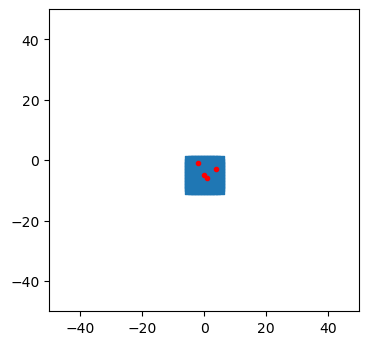

In [16]:
fig = plt.figure(dpi=100, figsize=(4, 4))

a.next_move([b, c, d])
b.next_move([a, c, d])
c.next_move([a, b, d])
d.next_move([a, b, c])

for agent in [a, b, c, d]:
    plt.plot(agent.x, agent.y, marker= ".", color = agent.col)

temp = np.array(list(a.searching_area))
plt.scatter(temp[:,0], temp[:,1], marker= "s")
plt.axis([-50, 50, -50, 50]) # x軸、y軸のMin, Maxを指定
plt.show()

In [6]:
# creating agents
agents = [Agent(random.randrange(-10, 10), random.randrange(-10, 10)) for i in range(10)]
agents.append(Agent(-10, 0, True))
agents.append(Agent(10, 0, True))

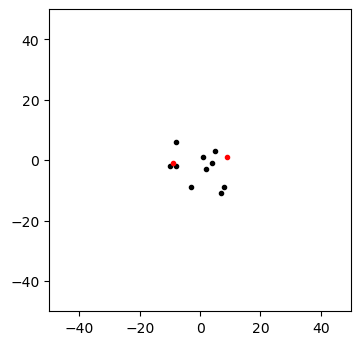

In [7]:
for i in range(len(agents)):
    agents[i].next_move(agents[0:i] + agents[(i + 1):len(agents)])

fig = plt.figure(dpi=100, figsize=(4, 4))
for agent in agents:
    plt.plot(agent.x, agent.y, marker= ".", color = agent.col)

plt.axis([-50, 50, -50, 50]) # x軸、y軸のMin, Maxを指定
plt.gca().set_aspect('equal')
plt.show()

In [12]:
%matplotlib nbagg

# creating agents
agents = [Agent(random.randrange(-10, 10), random.randrange(-10, 10)) for i in range(100)]
agents.append(Agent(-10, 0, True))
agents.append(Agent(10, 0, True))
agents.append(Agent(-10, -10, True))
agents.append(Agent(10, 10, True))

fig = plt.figure()
ims = []

for t in range(100):
    # plt.cla()
    for i in range(len(agents)):
        agents[i].next_move(agents[0:i] + agents[(i + 1):len(agents)])
    x = [agents[i].x for i in range(len(agents))]
    y = [agents[i].y for i in range(len(agents))]
    col = [agents[i].col for i in range(len(agents))]
    im = plt.scatter(x, y, marker= ".", c = col)
    ims.append([im]) 

ani = animation.ArtistAnimation(fig, ims)
plt.show()

<IPython.core.display.Javascript object>